In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds 
import numpy as np
import matplotlib.pyplot as plt 
import cv2

from tensorflow import keras

In [3]:
# Process the data
train_ds, test_ds = tfds.load('visual_domain_decathlon/gtsrb', 
                              split = ['train', 'test'], 
                              shuffle_files=True, as_supervised = True)

In [4]:
train_ds = tfds.as_numpy(train_ds)
test_ds = tfds.as_numpy(test_ds)

In [5]:
def create_img_label_set(data_set, dimension):
    image_set = []
    label_set = []
    for img in data_set:
        image, label = img[0], img[1]
        res = cv2.resize(image, dsize = (dimension, dimension), 
                         interpolation = cv2.INTER_CUBIC)
        image_set.append(res)
        label_set.append(label)
    return np.asarray(image_set), np.asarray(label_set)

In [6]:
img_train, label_train = create_img_label_set(train_ds, 72)
img_test, label_test = create_img_label_set(test_ds, 72)
print(img_train.shape[0]+img_test.shape[0])

43997


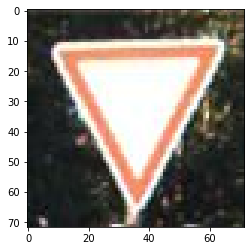

(72, 72, 3)
(72, 72, 3)
(72, 72, 3)
(72, 72, 3)
(72, 72, 3)
(72, 72, 3)


In [7]:
plt.imshow(img_train[0])
plt.show()
print(img_train[5].shape)
print(img_train[1].shape)
print(img_train[23].shape)
print(img_train[2].shape)
print(img_train[9].shape)
print(img_train[50].shape)

In [8]:
print('Train images shape:', img_train.shape)
print('Train labels shape:', label_train.shape)
print('Test images shape:', img_test.shape)
print('Test labels shape:', label_test.shape)

Train images shape: (31367, 72, 72, 3)
Train labels shape: (31367,)
Test images shape: (12630, 72, 72, 3)
Test labels shape: (12630,)


In [9]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), input_shape=(72,72,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

#model.add(keras.layers.Conv2D(64, (3, 3)))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))

In [10]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(img_train, label_train, validation_data = (img_test, label_test), epochs = 10, batch_size = 128)

Epoch 1/10


In [ ]:
# Evaluate the model
accuracy = model.evaluate(img_test, label_test, verbose = 0)
print('Accuracy: %.2f%%' % (accuracy[1]*100))